# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Support Vector Classifier Strategy Code

In this notebook, you will learn to create a Support Vector Classifier (SVC) algorithm on S&P 500. 

SVC is a type of supervised machine learning algorithm. Let's understand SVC with the help of an example. Suppose we have images of pens and pencils and we want the machine to identify which is which. We will train the algorithm by giving the algorithm a lot of labelled images of pens and pencils so that algorithm can learn the specific features of pens and pencils. After the algorithm has been trained we can use it to identify the unlabeled pictures of pens and pencils. 

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/kGHBSe4T/SVMdiagram.png "backtest")

The algorithm does this by drawing hyperplanes between the data points. The hyperplane can be 1 to n-dimensional depending on the number of features we are using to classify the data. If we use two features then the hyperplane will just be a line. In the above example, we used two features (X and Y) and the hyperplane divided the the inputs into two sets. If we use three features then the hyperplane will be a 2D plane. The dimenstions of the hyper plane = (features - 1).

To learn more about the SVC check this Quantra course on <a href="https://quantra.quantinsti.com/course/trading-machine-learning-classification-svm" target="_blank"> Trading with Machine Learning: Classification and SVM</a>. 

In this notebook, you will perform the following steps:

1. [Import the libraries](#import_the_libraries)
2. [Read S&P 500 Data](#read_s&p_500_data)
3. [Define the explanatory variables](#define_the_explanatory_variables)
3. [Define the target variables](#define_the_target_variable)
4. [Split the data into train and test](#split_the_data_into_train_and_test)
5. [Support Vector Classifier (SVC)](#support_vector_classifier)
6. [Classifier accuracy](#classifier_accuracy)
7. [Strategy implementation](#strategy_implementation)

<a id='Import the libraries'></a> 
## Import the libraries

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='Read S&P 500 Data'></a> 
## Read S&P 500 Data
The OHLC data for the index is stored in the `SPY.csv` file in the `data` folder. To read a CSV file, you can use `read_csv` method of `pandas`. The syntax is shown below.

Syntax: 
```python
import pandas as pd
pd.read_csv(filename, index_col)
```

Parameters: 

1. **filename**: Name of the file in the string format
2. **index_col**: The column name or number that you want to set as index (index number begins from 0)

We will read the S&P 500 data from CSV file.

In [ ]:
# The data is stored in the directory 'data'
path = '../data/'

# Read the csv file using read_csv method of pandas
df = pd.read_csv(path + 'SPY.csv', index_col=0)

# Convert index to datetime format
df.index = pd.to_datetime(df.index)

# Print the first five rows 
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,3442870000
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000


<a id='Define the explanatory variables'></a> 
## Define the explanatory variables

Explanatory or independent variables are used to predict the value. The `X` is a dataset that holds the features that SVC algorithm will use as independent variables for prediction. The `X` consists of variables such as `Open - Close` and `High - Low`. These can be understood as indicators based on which the algorithm will predict tomorrow's trend. The choice of using `Open - Close` and `High - Low`as features is arbitrary. Feel free to add more features and see the performance.

In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2018-12-31,-7.910156,26.419922
2019-01-02,-33.070068,52.020020
2019-01-03,44.030029,49.179932
2019-01-04,-57.609863,63.739990
2019-01-07,-14.079834,41.599854


<a id='Define the target variable'></a> 
## Define the target variable

Target variable is the outcome which the machine learning model will predict based on the explanatory variables. `y` is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow's price is greater than today's price then we will buy the S&P 500 index, else we will have no position in the S&P 500 index. We will store `1` for a buy signal and `0` for a no position in `y`.

We use `where()` function from NumPy to do this.

Syntax:
```python
import numpy as np
np.where(condition, value_if_true, value_if_false) 
```
Parameters: 

1. **Condition**: Condition to check
2. **value_if_true**: Value if the condition is satisfied 
3. **value_if_false**: Value If the condition is not satisfied

In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Print y
y

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

<a id='Split the data into train and test'></a> 
## Split the data into train and test

We will split data into training and test datasets. This is done so that we can fit the model on the training data and test the performance on the test data.

1. First, 80% of data is used for training and remaining data for testing.
2. X_train and y_train are train datasets.
3. X_test and y_test are test datasets.

In [ ]:
# Define the split percentage
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

<a id='Support Vector Classifier'></a> 
# Support Vector Classifier (SVC)
We will use `SVC()` function from `sklearn.svm.SVC` library to create our classifier model using `fit()` method on the training dataset.

Syntax:
```python
from sklearn.svm import SVC
SVC().fit(X, y) 
```
Parameters:

1. **X**: Explanatory variables in the training set
2. **y**: Target variable in the training set

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

<a id='predict_signals'></a> 
# Predict Signals

We will use the `predict` method on the `cls` variable to predict the signals. We will pass `X_test` as the parameter to the `predict` method. 

In [ ]:
y_predict = cls.predict(X_test)

<a id='Classifier accuracy'></a> 
# Classifier accuracy
We will compute the accuracy of the algorithm on the train and test data set by comparing the actual values of signal with the predicted values of signal. The function `accuracy_score()` will be used to calculate the accuracy.

Syntax:
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_predicted) 
```
Parameters: 

1. **y_true**: Actual/correct labels

2. **y_predicted**: Predicted labels, as returned by the classifier

In [ ]:
# train and test accuracy
accuracy_test = accuracy_score(y_test, y_predict)

print('Accuracy:{: .2f}%'.format(accuracy_test*100))

Accuracy: 54.32%


An accuracy of 50%+ in test data suggests that the classifier model is effective.

<a id='Strategy implementation'></a> 
## Strategy implementation

### Predict signal 

We will predict the signal (buy or sell) using the `cls.predict()` function.

### Compute returns in test period

We will predict the signals on the entire dataset `X`. And then we will compute strategy returns based on the predicted signal, and then save it in the column `cumulative_returns` and plot the cumulative returns. 

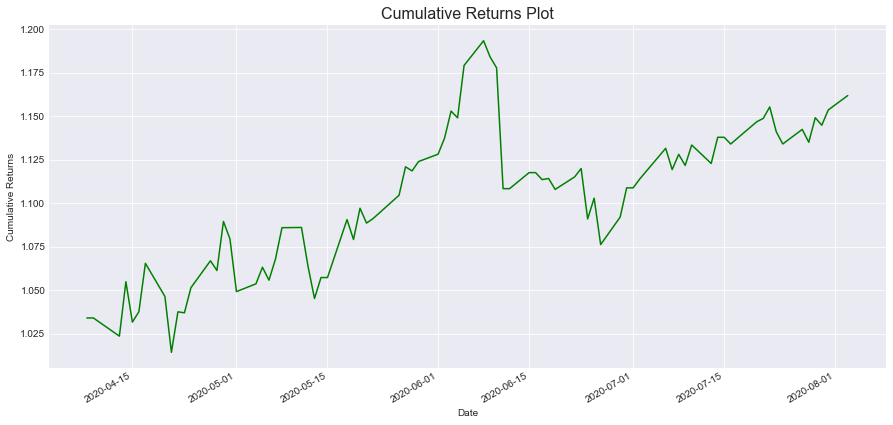

In [ ]:
# Predicted Signal
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Returns'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Returns'] = df.Returns * df.Predicted_Signal.shift(1)

# Calculate geometric returns
df['cumulative_returns'] = (df.Strategy_Returns.iloc[split:]+1).cumprod()

# Set the title and axis labels
plt.title("Cumulative Returns Plot", fontsize=16)
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")

# Plot geometric returns
df['cumulative_returns'].plot(figsize=(15, 7),color='g')

plt.show()

As seen from the graph, the strategy generates a return of approximately 16% in the test data set.

This notebook shows how you can implement the SVC strategy step by step with Python. You can train and test your model and also check the strategy implementation with a visual representation (graph).

## Tweak the code
You can tweak the code in the following ways:

1. Use different datasets: Backtest and try out the model on different datasets!
2. Features: Create your features using different indicators that could improve the prediction accuracy.

In the next units, you will be able to practice some important concepts learned in this section. In the next section, you will learn Natural Language Processing (NLP) and its implementation in sentiment analysis.
<br><br>